In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print('Modules are imported.')

Modules are imported.


In [2]:
df=pd.read_csv("/content/covid19_Confirmed_dataset.csv")
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [3]:
df.shape

(266, 104)

In [4]:
df.drop(["Lat","Long"],axis=1,inplace=True)

In [5]:
df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [6]:
aggregating=df.groupby("Country/Region").sum()

In [7]:
aggregating.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [8]:
aggregating.shape

(187, 101)

Column 'Province/State' could not be converted to numeric and will be skipped.


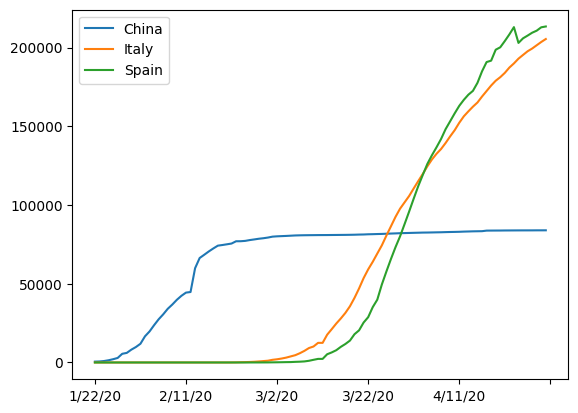

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your original DataFrame

aggregating = df.groupby("Country/Region").sum()

# Convert columns to numeric if they are not already
for col in aggregating.columns:
    if aggregating[col].dtype != 'int64' and aggregating[col].dtype != 'float64':
        try:
            aggregating[col] = pd.to_numeric(aggregating[col])
        except ValueError:
            print(f"Column '{col}' could not be converted to numeric and will be skipped.")

# Select only numeric columns for plotting
numeric_cols = aggregating.select_dtypes(include=['number']).columns

# Plot selected numeric data for specific countries
aggregating.loc["China", numeric_cols].plot()
aggregating.loc["Italy", numeric_cols].plot()
aggregating.loc["Spain", numeric_cols].plot()
plt.legend()
plt.show()

Column 'Province/State' could not be converted to numeric and will be skipped.


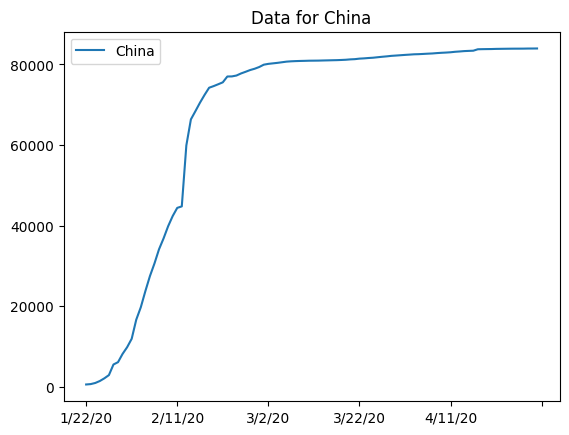

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your original DataFrame

aggregating = df.groupby("Country/Region").sum()

# Convert columns to numeric if they are not already
for col in aggregating.columns:
    if aggregating[col].dtype != 'int64' and aggregating[col].dtype != 'float64':
        try:
            aggregating[col] = pd.to_numeric(aggregating[col]) # Convert to numeric if possible
        except ValueError:
            print(f"Column '{col}' could not be converted to numeric and will be skipped.")

# Select only numeric columns for plotting
numeric_cols = aggregating.select_dtypes(include=['number']).columns

# Plot selected numeric data for China
aggregating.loc["China", numeric_cols].plot() # Plot only numeric columns for China
plt.title("Data for China")
plt.legend()
plt.show()

<Axes: >

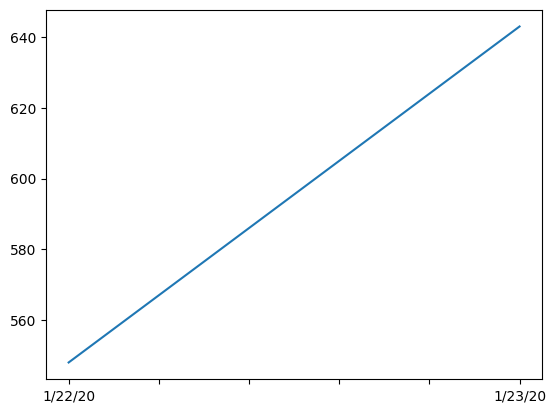

In [15]:
# Convert the desired columns to numeric before plotting
aggregating.loc['China', aggregating.columns[:3]] = pd.to_numeric(aggregating.loc['China', aggregating.columns[:3]], errors='coerce')

# Plot the data
aggregating.loc['China'][:3].plot()

<Axes: >

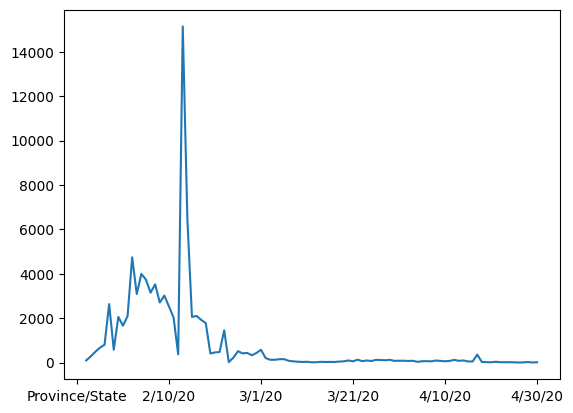

In [16]:
aggregating.loc['China'].diff().plot()

In [17]:
aggregating.loc['China'].diff().max()

15136

In [18]:
aggregating.loc['Italy'].diff().max()

6557

In [19]:
aggregating.loc['Spain'].diff().max()

9630

In [20]:
aggregating.loc['Spain'].diff().max()

9630

In [21]:
aggregating.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [25]:
import pandas as pd

# Calculate the maximum infection rate for each country, considering only numeric columns
max_infection_rates = aggregating.select_dtypes(include=np.number).max(axis=1)

# Create a DataFrame from the calculated series
data = pd.DataFrame(max_infection_rates, columns=['max_infection_rates'])

# Now 'data' will have a column named 'max_infection_rates' containing the maximum values
# You can then proceed to use 'data' in your analysis

# Print out the data column to verify
print(data)

                    max_infection_rates
Country/Region                         
Afghanistan                        2171
Albania                             773
Algeria                            4006
Andorra                             745
Angola                               27
...                                 ...
West Bank and Gaza                  484
Western Sahara                        6
Yemen                                 6
Zambia                              106
Zimbabwe                             40

[187 rows x 1 columns]


In [26]:
data.head()

,max_infection_rates
Country/Region,
Afghanistan,2171
Albania,773
Algeria,4006
Andorra,745
Angola,27


In [30]:
import pandas as pd
import os

# Get the current working directory
current_directory = os.getcwd()
print("Current working directory:", current_directory)

# Construct the absolute path to the file
file_path = os.path.join(current_directory, "/content/worldwide_happiness_report.csv")

# Try reading the file using the absolute path
try:
    happiness = pd.read_csv(file_path)
    print("File loaded successfully!")
except FileNotFoundError:
    print("File not found at:", file_path)
    print("Please ensure the file exists at the specified path or adjust the path accordingly.")

Current working directory: /content
File loaded successfully!


In [32]:
happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [33]:
cols=["Overall rank","Score","Generosity","Perceptions of corruption"]

In [34]:
happiness.drop(cols,axis=1,inplace=True)
happiness.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [35]:
happiness.set_index("Country or region",inplace=True)
happiness.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [36]:
data.head()

,max_infection_rates
Country/Region,
Afghanistan,2171
Albania,773
Algeria,4006
Andorra,745
Angola,27


In [37]:
happiness.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [38]:
final=data.join(happiness,how="inner")
final.head()

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,2171,0.350,0.517,0.361,0.000
Albania,773,0.947,0.848,0.874,0.383
Algeria,4006,1.002,1.160,0.785,0.086
Argentina,4428,1.092,1.432,0.881,0.471
Armenia,2066,0.850,1.055,0.815,0.283


In [39]:
final.corr()

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rates,1.000000,0.328993,0.241542,0.341925,0.029729
GDP per capita,0.328993,1.000000,0.759468,0.863062,0.394603
Social support,0.241542,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.341925,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.029729,0.394603,0.456246,0.427892,1.000000


In [40]:
final.head()

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,2171,0.350,0.517,0.361,0.000
Albania,773,0.947,0.848,0.874,0.383
Algeria,4006,1.002,1.160,0.785,0.086
Argentina,4428,1.092,1.432,0.881,0.471
Armenia,2066,0.850,1.055,0.815,0.283


<Axes: xlabel='GDP per capita', ylabel='max_infection_rates'>

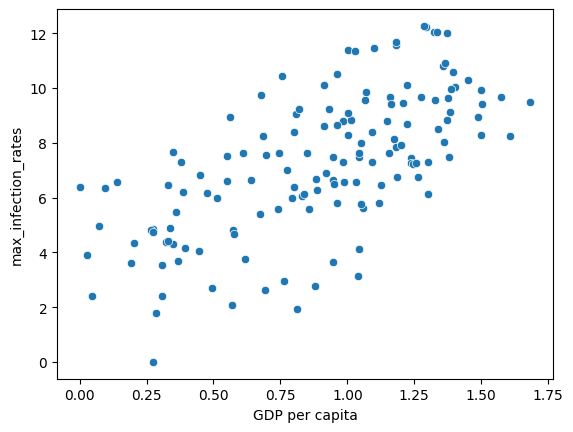

In [42]:
import numpy as np
import seaborn as sns

x = final["GDP per capita"]
y = final["max_infection_rates"]

# Use keyword arguments to specify x and y data
sns.scatterplot(x=x, y=np.log(y))

<Axes: xlabel='GDP per capita', ylabel='max_infection_rates'>

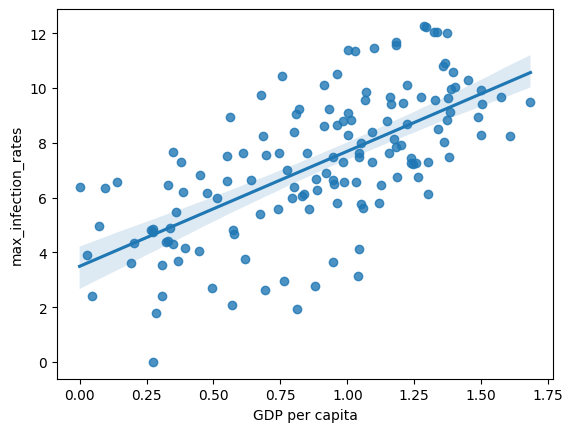

In [44]:
import numpy as np
import seaborn as sns

# Assuming 'final' is your DataFrame
sns.regplot(x='GDP per capita', y=np.log(final["max_infection_rates"]), data=final)
# Use column names as strings for x and y, and provide the DataFrame using 'data' keyword

<Axes: xlabel='Social support', ylabel='max_infection_rates'>

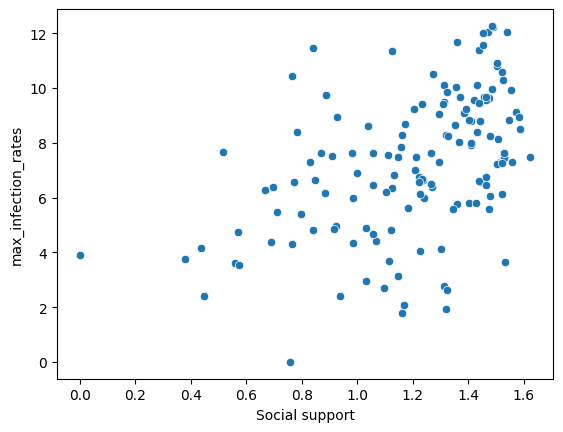

In [46]:
import numpy as np
import seaborn as sns

x = final["Social support"]
y = final["max_infection_rates"]

# Use keyword arguments to specify x and y data
sns.scatterplot(x=x, y=np.log(y))
# This tells scatterplot explicitly which data corresponds to the x and y axes

<Axes: xlabel='Social support', ylabel='max_infection_rates'>

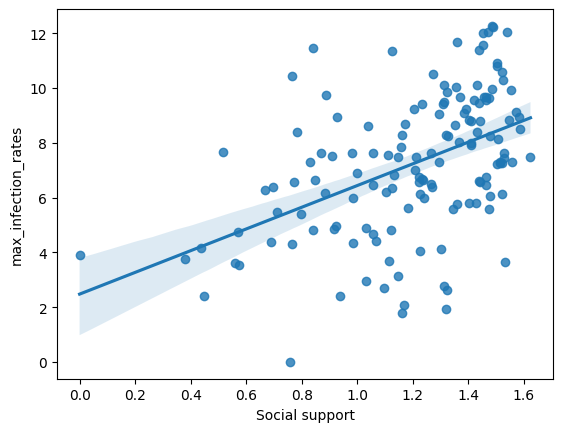

In [48]:
import numpy as np
import seaborn as sns

# Assuming 'final' is your DataFrame and 'Social support' and 'max_infection_rates' are columns in it
sns.regplot(x='Social support', y=np.log(final["max_infection_rates"]), data=final)
# Use column names as strings for x and y, and provide the DataFrame using 'data' keyword

<Axes: xlabel='Healthy life expectancy', ylabel='max_infection_rates'>

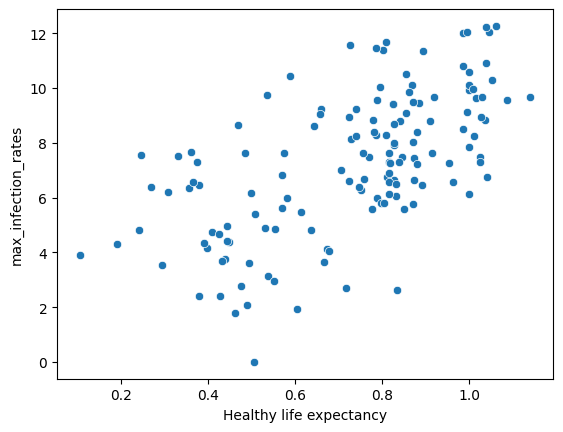

In [50]:
import numpy as np
import seaborn as sns

x = final["Healthy life expectancy"]
y = final["max_infection_rates"]

# Use keyword arguments to specify x and y data
sns.scatterplot(x=x, y=np.log(y))
# This tells scatterplot explicitly which data corresponds to the x and y axes

<Axes: xlabel='Healthy life expectancy', ylabel='max_infection_rates'>

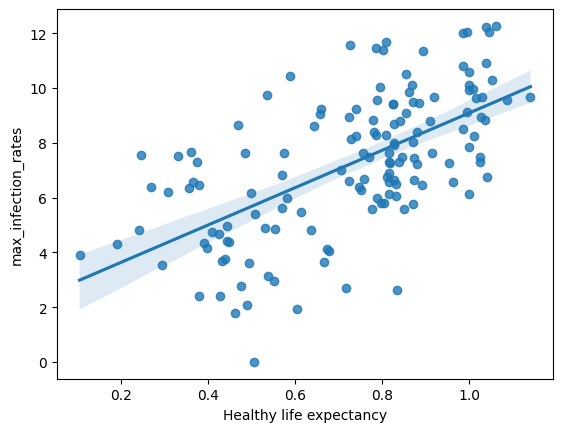

In [52]:
import numpy as np
import seaborn as sns

# Assuming 'x' and 'y' are pandas Series or numpy arrays:
sns.regplot(x=x, y=np.log(y))
# Use keyword arguments 'x' and 'y' to specify the data

<Axes: xlabel='Freedom to make life choices', ylabel='max_infection_rates'>

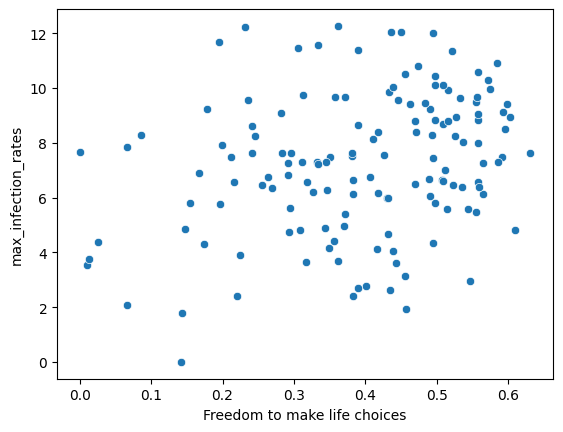

In [54]:
import numpy as np
import seaborn as sns

x = final["Freedom to make life choices"]
y = final["max_infection_rates"]

# Use keyword arguments to specify x and y data
sns.scatterplot(x=x, y=np.log(y))
# This tells scatterplot explicitly which data corresponds to the x and y axes

<Axes: xlabel='Freedom to make life choices', ylabel='max_infection_rates'>

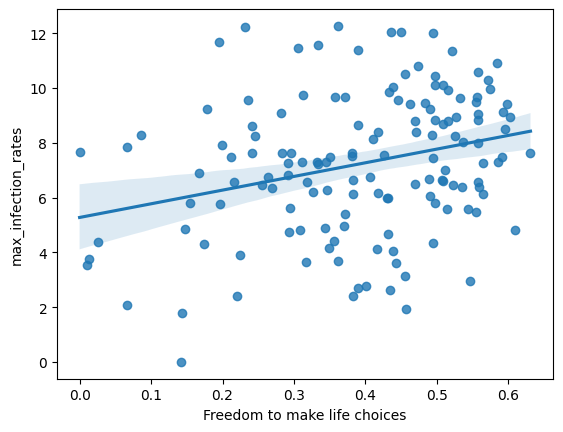

In [56]:
import numpy as np
import seaborn as sns

# Assuming 'x' and 'y' are pandas Series or numpy arrays:
sns.regplot(x=x, y=np.log(y))
# Use keyword arguments 'x' and 'y' to specify the data